### Imports

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# эти строки определяют глобальные свойства фигуры, используемые для публикации
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

### Theory

В линейной алгебре вектор – это упорядоченный список чисел. (В абстрактной линейной алгебре векторы могут содержать другие математические объекты, включая функции; однако поскольку данная книга ориентирована на
приложения, мы будем рассматривать только те векторы, которые содержат
числа.)

Векторы обладают несколькими важными характеристиками.

Первые две, с которых мы начнем, – это:
- размерность - число чисел в векторе;
- ориентация - ориентирован ли вектор вдоль столбца либо вдоль строки.


Ранее я писал, что размерность вектора – это число элементов в этом векторе.

Однако в Python размерность вектора или мат­ри­цы – это число геометрических измерений, используемых для распечатки числового объекта.


Например, все показанные выше векторы считаются в Python «двумерными массивами» независимо от содержащегося в векторах числа элементов (то есть математической размерности). Список чисел без определенной ориентации в Python считается одномерным массивом независимо от числа
элементов (этот массив будет распечатан в виде строки, но, как вы увидите позже, он обрабатывается иначе, чем вектор-строка).

Математическая размерность – число элементов в векторе – в Python называется длиной, или
очертанием, вектора.

### Создание и визуализация векторов в NumPy

In [2]:
# 4 способа создание вектора в Numpy
asList = [1, 2, 3]
# одномерный массив
asArray = np.array([1, 2, 3])
# строка
rowVec = np.array([[1, 2, 3]])
# столбец
colVec = np.array([[1], [2], [3]])

In [3]:
# отобразим размерности созданных векторов
print(f'asList: {np.shape(asList)}')
print(f'asArray: {asArray.shape}')
print(f'rowVec: {rowVec.shape}')
print(f'colVec: {colVec.shape}')

asList: (3,)
asArray: (3,)
rowVec: (1, 3)
colVec: (3, 1)


Результат показывает, что одномерный массив asArray имеет размер (3),
тогда как наделенные ориентацией векторы являются двумерными масси-
вами и хранятся как размер (1,3) либо (3,1) в зависимости от ориентации.
Размеры всегда указываются как (строки, столбцы).

Переменная asArray – это неориентированный массив, и, значит, это ни вектор-строка, ни вектор-столбец, а просто одномерный список чисел в NumPy.

В NumPy ориентация задается скобками: самые внешние скобки группируют все числа вместе в один объект. Затем каждый дополнительный набор скобок
указывает строку: вектор-строка (переменная rowVec) содержит все числа
в одной строке, в то время как вектор-столбец (переменная colVec) содержит
несколько строк, причем каждая строка содержит одно число.

### Геометрия векторов

Упорядоченный список чисел – это алгебраическая интерпретация вектора;

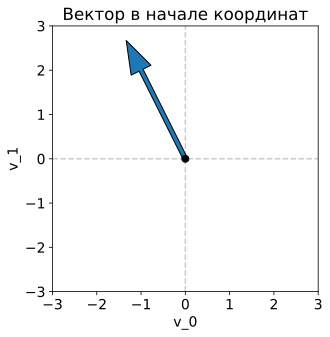

In [4]:
# создадим вектор
v = np.array([-1,2])

# строим вектор (с точкой в хвосте)
plt.arrow(0, 0, v[0], v[1], head_width=0.5, width=0.1)
plt.plot(0, 0, 'ko', markerfacecolor='k', markersize=7)

# добавляем сетку осей
plt.plot([-3, 3], [0, 0], '--', color=[0.8, 0.8, 0.8], zorder=-1)
plt.plot([0, 0], [-3, 3], '--', color=[0.8, 0.8, 0.8], zorder=-1)

plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('v_0')
plt.ylabel('v_1')
plt.title('Вектор в начале координат')
plt.show()

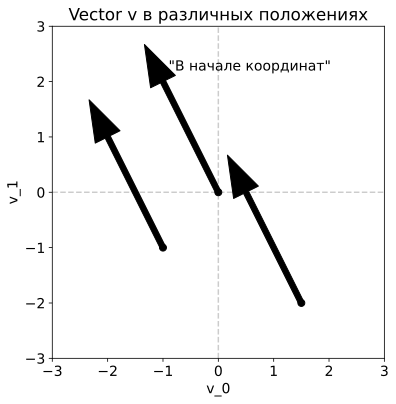

In [5]:
# диапазон начальных позиций вектора
startPos = [
            [0,0],
            [-1, -1],
            [1.5, -2]
            ]

# создание новой фигуры
fig = plt.figure(figsize=(6,6))

for s in startPos:
    # построение нового вектора (с точками в начале)
    plt.arrow(s[0], s[1], v[0], v[1], head_width=0.5, width=0.1, color='black')
    plt.plot(s[0],s[1], 'ko', markerfacecolor='k', markersize=7)

    # Обозначение вектора, если он в начале координат
    if s == [0, 0]:
        plt.text(v[0]+0.1, v[1]+0.2, '"В начале координат"')

# добавление сетки осей
plt.plot([-3,3], [0,0], '--', color=[0.8, 0.8, 0.8], zorder=-1)
plt.plot([0,0], [-3,3], '--', color=[0.8, 0.8, 0.8], zorder=-1)

# косметика для отображения картинки
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('v_0')
plt.ylabel('v_1')
plt.title('Vector v в различных положениях')
plt.savefig('Figure_02_01.png',dpi=300) # write out the fig to a file
plt.show()

### Операции с векторами

Некоторые линейно-алгебраические операции элементарны и интуитивно понятны и работают именно так, как вы и ожидаете (например, сложение), в то время как другие более сложны и требуют объяснений в объеме целых глав (например, сингулярное разложение).

Давайте начнем с элементарных
операций.

#### Сложение двух векторов

Для того чтобы сложить два вектора, надо просто сложить каждый соответствующий элемент.

##### Пример сложения

In [6]:
# Using 2D vectors here instead of 3D vectors in the book to facilitate visualization
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w

# print out all three vectors
print(f'вектор v: {v}')
print(f'вектор w: {w}')
print(f'результирующий вектор суммы: {vPlusW}')

вектор v: [1 2]
вектор w: [ 4 -6]
результирующий вектор суммы: [ 5 -4]


##### Попытка сложения векторов разных размерностей

In [7]:
# зададим новые вектора
vec_1 = np.array([4, 5, 6])
vec_2 = np.array([10, 20, 30])
vec_3 = np.array([0, 3, 17, 25])

In [8]:
# вернет array([14, 25, 36])
vec_1 + vec_2

array([14, 25, 36])

In [9]:
vec_1.shape, vec_2.shape, vec_3.shape

((3,), (3,), (4,))

In [10]:
# вернет ошибку, т.к. измерения не совпадают
vec_2 + vec_3

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

##### Ориентиация вектора при сложении

Данный пример показывает, что ориентация действительно важна:
два вектора можно сложить, только если они имеют одинаковую размерность
и одинаковую ориентацию.

In [11]:
vec_1 = np.array([[15, 10 , -2]])
print(f'Вектор-строка:{vec_1}')
vec_2 = np.array([[15, 10 , -2]]).T
print(f'Вектор-столбец:{vec_2}')

Вектор-строка:[[15 10 -2]]
Вектор-столбец:[[15]
 [10]
 [-2]]


In [12]:
vec_1 + vec_2

array([[30, 25, 13],
       [25, 20,  8],
       [13,  8, -4]])

В данном примере каждое значение вектора-строки поочередно складывается с каждым значением вектора-столбца и записывается в результирующий вектор-столбец, образуя матрицу.

### Разность двух векторов

Вычитание векторов – это тоже то, что вы и ожидаете: вычесть второй вектор
из первого поэлементно.

In [13]:
V_minus_W = v-w

In [14]:
print(f'результирующий вектор разности: {V_minus_W}')

результирующий вектор разности: [-3  8]


### Геометрия сложения и вычитания векторов

Для того чтобы сложить два вектора геометрически, надо расположить векторы так, чтобы хвост одного вектора находился в голове другого вектора.
Суммируемый вектор проходит от хвоста первого вектора к голове второго
(график А на рис. 2.2).

Эту процедуру можно расширить, чтобы суммировать
любое число векторов: надо просто уложить все векторы от хвоста к голове,
и тогда сумма будет равна отрезку, идущему от первого хвоста к итоговой
голове.


Геометрическое вычитание векторов немного отличается, но является
одинаково элементарным: надо выровнять два вектора так, чтобы их хвос­
ты находились в одной и той же координате (это легко достигается, если оба
вектора находятся в стандартном положении); вектор разности – это отрезок
который идет от головы «отрицательного» вектора к голове «положительно-
го» вектора (график В на рис. 2.2).


Не стоит недооценивать важность геометрии вычитания векторов: она ле-
жит в основе ортогонального разложения векторов, которое, в свою очередь,
лежит в основе метода линейных наименьших квадратов, который является
одним из наиболее важных приложений линейной алгебры в науке и технике.

### Умножение вектора на скаляр

Скаляр в линейной алгебре – это число в чистом виде, не вложенное ни в век-
тор, ни в мат­ри­цу. Скаляры обычно обозначаются строчными греческими
буквами, такими как α или λ. Поэтому умножение вектора на скаляр обозначается, например, как βu.
Умножение вектора на скаляр выполняется очень просто: надо умножить
каждый элемент вектора на скаляр.

Вектор нулей

Вектор, состоящий из одних нулей, также именуемый вектором нулей, или нуль-вектором,
обозначается жирным шрифтом, **0**, и в линейной алгебре является специальным вектором.

Нередко использование вектора нулей для решения задачи фактически принято называть тривиальным решением и исключать. Линейная алгебра полна утверждений типа
«найти ненулевой вектор, который может решить ...» или «найти нетривиальное решение
для ...».

In [15]:
scalar_1 = -0.5
vec_1 = np.array([2,4,6])

scalar_2 = -3
vec_2 = np.array([-1,-3, -6])

mult_1 = vec_1 * scalar_1
mult_2 = vec_2 * scalar_2

print(mult_1, mult_2)

[-1. -2. -3.] [ 3  9 18]


#### Сложение вектора со скаляром

Сложение скаляра с вектором формально в линейной алгебре не определе-
но: это два отдельных вида математических объектов, которые невозможно
объединить. Однако программы числовой обработки, такие как Python, по-
зволяют складывать скаляры с векторами, и указанная операция сравнима
с умножением скаляра на вектор: скаляр прибавляется к каждому элементу
вектора. Следующий ниже исходный код иллюстрирует эту идею:

In [24]:
scalar = -0.5
vec = np.array([2,4,6])

scalar + vec

array([1.5, 3.5, 5.5])

#### Геометрия умножения вектора на скаляр

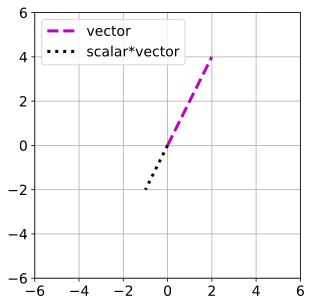

In [26]:
# plot
plt.plot([0,vec[0]],[0,vec[1]],'m--',linewidth=3,label='vector')
plt.plot([0,scalar*vec[0]],[0,scalar*vec[1]],'k:',linewidth=3,label='scalar*vector')

plt.grid()
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend()
plt.show()

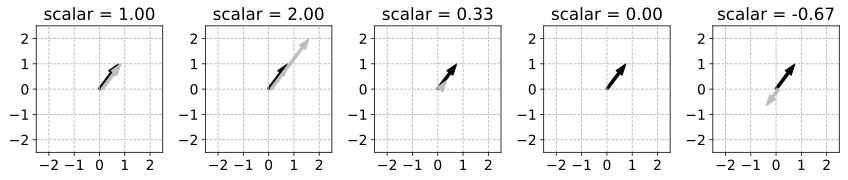

In [27]:
# Effects of different scalars

# a list of scalars:
scalars = [ 1, 2, 1/3, 0, -2/3 ]

baseVector = np.array([ .75,1 ])

# create a figure
fig,axs = plt.subplots(1,len(scalars),figsize=(12,3))
i = 0 # axis counter

for s in scalars:

  # compute the scaled vector
  v = s*baseVector

  # plot it
  axs[i].arrow(0,0,baseVector[0],baseVector[1],head_width=.3,width=.1,color='k',length_includes_head=True)
  axs[i].arrow(.1,0,v[0],v[1],head_width=.3,width=.1,color=[.75,.75,.75],length_includes_head=True)
  axs[i].grid(linestyle='--')
  axs[i].axis('square')
  axs[i].axis([-2.5,2.5,-2.5,2.5])
  axs[i].set(xticks=np.arange(-2,3), yticks=np.arange(-2,3))
  axs[i].set_title(f'scalar = {s:.2f}')
  i+=1 # update axis counter

plt.tight_layout()
plt.savefig('Figure_02_03.png',dpi=300)
plt.show()


### Транспонирование

Вы уже узнали об операции транспонирования: она конвертирует векто-
ры-столбцы в векторы-строки и наоборот. Тут стоит дать несколько более
формальное определение, которое будет обобщено на транспонирование
матриц (тема в главе 5).

Матрица состоит из строк и столбцов; следовательно, каждый элемент
матрицы имеет индекс в формате (строка, столбец). Операция транспони-
рования просто меняет местами эти индексы.

In [48]:
col = np.array([[1,2,3]]).T    # вектор-столбец
row = np.array([[1, 2, 3]])    # вектор-строка
vec_sum = v + w    # сумма при помощи транслирования
print(col)
print('\n')
print(row)
print('\n')
print(vec_sum)

[[1]
 [2]
 [3]]


[[1 2 3]]


[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [49]:
row = np.array([ [1,2,3] ])

In [53]:
# для лучшего понимания операций транспонирования
# выведем вектор - строку
print(row), print(' ')

# выведем операция транспонирования с ветктором-строкой
print(row.T), print(' ')

# операция двойного транспонирования вернет исходный вектор-строку
print(row.T.T)

[[1 2 3]]
 
[[1]
 [2]
 [3]]
 
[[1 2 3]]


В данном случае транспонирование не происходит, потому что массив l в коде является одномерным массивом (numpy массивом с одним измерением), а у одномерных массивов в библиотеке NumPy нет понятия.

Необходимо быть внимательным!)

In [54]:
l = np.array([1,2,3])
print(l), print(' ')
print(l.T), print(' ')
print(l.T.T)

[1 2 3]
 
[1 2 3]
 
[1 2 3]


### Модуль вектора и единичные векторы

Модуль вектора, также именуемый геометрической длиной, или нормой, представляет собой расстояние от хвоста до головы вектора и вычисляется с использованием стандартной формулы евклидова расстояния: квадратный корень из суммы квадратов элементов вектора

Прежде чем показать исходный код Python, следует объяснить еще не-
сколько терминологических разночтений между линейной алгеброй «на ме-
ловой доске» и линейной алгеброй на Python. В математике размерность
вектора – это число элементов в этом векторе, тогда как длина – это гео-
метрическое расстояние; на языке Python функция len() (где len – это со-
кращение от англ. length, длина) возвращает размерность массива, тогда как
функция np.norm() возвращает геометрическую длину (модуль вектора). Во
избежание путаницы в данной книге вместо термина длина я буду использо-
вать термин модуль вектора (либо геометрическая длина):

In [59]:
vec = np.array([1, 2, 3, 7, 8, 9])
vec_dim = len(vec)    # Математическая размерность
vec_mag = np.linalg.norm(vec)    # Геометрическая длина вектора

print(vec)
print(vec_dim)
print(vec_mag)

[1 2 3 7 8 9]
6
14.422205101855956


Существуют приложения, в которых нужен вектор, геометрическая длина
которого равна единице, и такой вектор называется единичным вектором.
Примеры приложений включают ортогональные матрицы, матрицы поворота, собственные векторы и сингулярные векторы.

### Точечное произведение векторов

Точечное произведение (также иногда именуемое внутренним произведением)
является одной из наиболее важных операций во всей линейной алгебре. Это
базовый вычислительный строительный блок, на основе которого строятся
многие операции и алгоритмы, включая свертку, корреляцию, результаты
преобразования Фурье, матричное умножение, извлечение линейных признаков, фильтрацию сигналов и т. д.

Точечное произведение – это одно число, которое предоставляет информацию о взаимосвязи между двумя векторами. Давайте сначала сосредоточимся на алгоритме вычисления точечного произведения, а затем я расскажу, как его интерпретировать.
Для вычисления точечного произведения надо перемножить соответствующие элементы двух векторов, а затем просуммировать все отдельные произведения. Другими словами, это поэлементное умножение и сумма.

Пример вычисления точечного произведения

[1 2 3 4] х [5 6 7 8] = 1×5 + 2×6 + 3×7 + 4×8
= 5 + 12 + 21 + 32
= 70.

In [61]:
vec_1 = np.array([1, 2, 3, 4])
vec_2 = np.array([5, 6, 7, 8])
np.dot(vec_1, vec_2)

np.int64(70)

#### Примечание к функции np.dot()
На самом деле точечное произведение векторов в функции np.dot() не реализовано;
в ней реализовано умножение матриц, которое представляет собой набор точечных
произведений. Это будет иметь больше смысла после ознакомления с правилами и ме-
ханизмами умножения матриц (глава 5). Если вы хотите обследовать их сейчас, то мо-
жете изменить приведенный выше исходный код, чтобы придать обоим векторам ори-
ентацию (вдоль строки в противовес ориентации вдоль столбца). И вы обнаружите, что
результат будет точечным произведением только тогда, когда первый аргумент на вхо-
де в функцию представляет собой вектор-строку, а второй аргумент – вектор-столбец.

Вот интересное свойство точечного произведения: умножение одного вектора на скаляр шкалирует точечное произведение на то же число. Указанное свойство можно обследовать, расширив приведенный ранее исходный код:

In [62]:
scalar = 10
np.dot(scalar*vec_1, vec_2)

np.int64(700)

Теперь попробуем со скаляром = -1

In [63]:
scalar = -1
np.dot(scalar*vec_1, vec_2)

np.int64(-70)

Теперь вы знаете, как вычислять точечное произведение. Каков смысл
точечного произведения и как его интерпретировать?
Точечное произведение можно интерпретировать как меру сходства, или
соотнесенности, между двумя векторами. Представьте, что вы собрали дан-
ные о росте и весе 20 человек и сохранили эти данные в двух векторах. Вы,
конечно же, ожидаете, что эти переменные будут друг с другом связаны (бо-
лее высокие люди, как правило, весят больше), и поэтому можно ожидать,
что точечное произведение между этими двумя векторами будет большим.
С другой стороны, величина точечного произведения зависит от шкалы дан-
ных, и, стало быть, точечное произведение между данными, измеренными
в граммах и сантиметрах, будет больше, чем точечное произведение между
данными, измеренными в фунтах и футах. Однако указанное произвольное
шкалирование можно устранить с помощью коэффициента нормализации.
Нормализованное точечное произведение между двумя переменными на
самом деле называется коэффициентом корреляции Пирсона, и оно является
одним из наиболее важных методов анализа в науке о данных. Подробнее об
этом будет в главе 4!

#### Точечное произведение является дистрибутивным